<h2>Socio-economic Impact on Green Jobs: An EDA Approach (Pareto Analysis) </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

<h4>Load dataset from csv</h4>

In [3]:
# load csv
df = pd.read_csv('complete_renewable_energy_dataset 2.csv')

In [4]:
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


In [5]:
# Data Cleaning
# no missing values
# df.isnull().sum()
# drop duplicate rows
df = df.drop_duplicates()
# df

In [6]:
# collect all numeric columns
# remove non-numeric cols
num_cols = df.select_dtypes(include=[np.number])
cat_cols = ['Year']
# drop Year
numeric_cols = num_cols.drop(cat_cols, axis=1)
# numeric_cols

In [7]:
numeric_cols.columns

Index(['Production (GWh)', 'Installed Capacity (MW)', 'Investments (USD)',
       'Population', 'GDP', 'Energy Consumption', 'Energy Exports',
       'Energy Imports', 'CO2 Emissions', 'Renewable Energy Jobs',
       'Government Policies', 'R&D Expenditure', 'Renewable Energy Targets',
       'Average Annual Temperature', 'Annual Rainfall', 'Solar Irradiance',
       'Wind Speed', 'Hydro Potential', 'Geothermal Potential',
       'Biomass Availability', 'Energy Storage Capacity',
       'Grid Integration Capability', 'Electricity Prices', 'Energy Subsidies',
       'International Aid for Renewables', 'Public Awareness',
       'Energy Efficiency Programs', 'Urbanization Rate',
       'Industrialization Rate', 'Energy Market Liberalization',
       'Renewable Energy Patents', 'Educational Level',
       'Technology Transfer Agreements', 'Renewable Energy Education Programs',
       'Local Manufacturing Capacity', 'Import Tariffs on Energy Equipment',
       'Export Incentives for Energy

<h4>Calculate the correlation between 'Renewable Energy Jobs' and other columns</h4>

In [8]:
corr_matrix = numeric_cols.corr()
corr_with_green_jobs = corr_matrix['Renewable Energy Jobs'].abs().sort_values(ascending=False)

# Select the top 10 socio-economic factors with the highest correlation with 'Green Jobs'
top_factors = corr_with_green_jobs[1:11]  # exclude 'Renewable Energy Jobs' itself

In [9]:
# Create a new DataFrame with the top factors and their corresponding correlation values
pareto_df = pd.DataFrame({'Socio-economic Factors': top_factors.index, 
                          'Correlation': top_factors.values})

In [10]:
# Calculate the cumulative frequency and percentage
pareto_df['Frequency'] = pareto_df['Correlation']
total_count = pareto_df['Frequency'].sum()
pareto_df['% Frequency'] = (pareto_df['Frequency'] / total_count * 100)
pareto_df['Cumulative Frequency'] = pareto_df['Frequency'].cumsum()
pareto_df['% Cumulative Frequency'] = (pareto_df['Cumulative Frequency'] / pareto_df['Frequency'].sum()) * 100

<h4>Pareto Chart</h4>

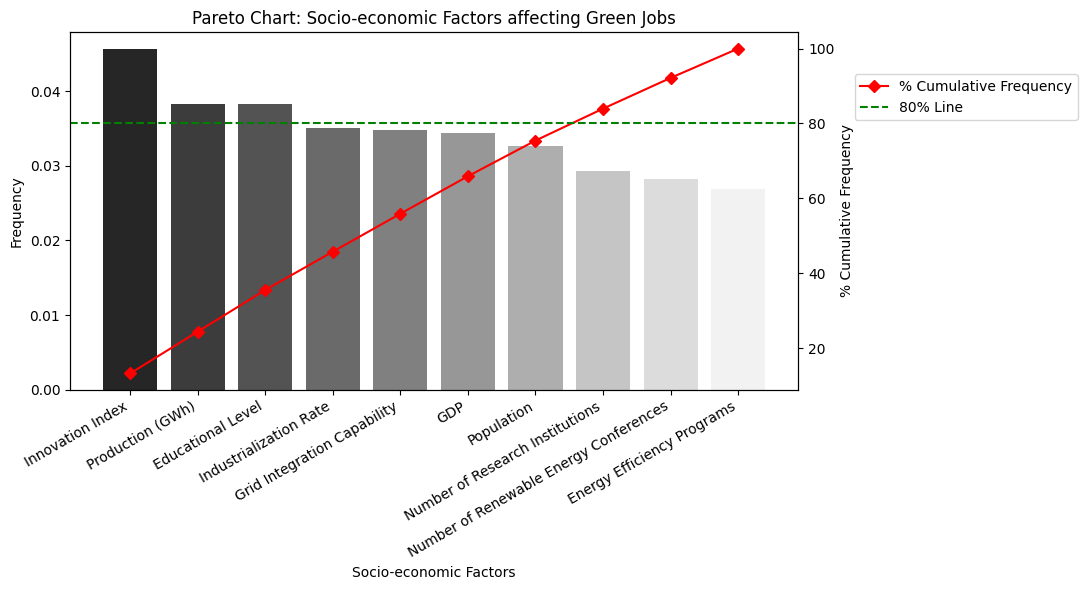

In [11]:
# Create the Pareto chart
plt.figure(figsize=(11, 6))
plt.xticks(rotation=30, ha='right')

# Bar plot for each factor's total contribution
sns.barplot(x='Socio-economic Factors', y='Frequency', data=pareto_df, hue='Socio-economic Factors', palette='dark:#f2f2f2')
plt.twinx()
plt.plot(pareto_df['Socio-economic Factors'], pareto_df['% Cumulative Frequency'], marker='D', linestyle='-', color='red', label='% Cumulative Frequency')
plt.axhline(80, color='green', linestyle='--', label='80% Line')

# Title and labels
plt.title('Pareto Chart: Socio-economic Factors affecting Green Jobs')
plt.xlabel('Socio-economic Factors')
plt.ylabel('% Cumulative Frequency')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=3)
plt.tight_layout()
plt.show()

<h4>Tabulate the Result</h4>

In [12]:
# Print the Pareto analysis result
pareto_df

,Socio-economic Factors,Correlation,Frequency,% Frequency,Cumulative Frequency,% Cumulative Frequency
0,Innovation Index,0.045627,0.045627,13.281056,0.045627,13.281056
1,Production (GWh),0.038296,0.038296,11.147008,0.083923,24.428064
2,Educational Level,0.038253,0.038253,11.134724,0.122176,35.562788
3,Industrialization Rate,0.035100,0.035100,10.216763,0.157276,45.779551
4,Grid Integration Capability,0.034835,0.034835,10.139812,0.192112,55.919363
5,GDP,0.034364,0.034364,10.002717,0.226476,65.922080
6,Population,0.032715,0.032715,9.522587,0.259191,75.444667
7,Number of Research Institutions,0.029273,0.029273,8.520588,0.288463,83.965255
8,Number of Renewable Energy Conferences,0.028191,0.028191,8.205885,0.316655,92.171140
9,Energy Efficiency Programs,0.026896,0.026896,7.828860,0.343551,100.000000


<h4>Findings</h4>

<p>
Based on the analysis:
Ranking: The factors affecting "Green Jobs" can be ranked by their frequency based on the correlation computed. According to the chart and table, the top three socio-economic factors are Innovation Index, Production (GWH) and eEducational Level with percentage frequency of 13.28%, 11.15%, and 11.13% respectively. It indicates that this three socio-economic factors are the green jobs vital views or signifivcant factors.
    
Impact Analysis: The cumulative percentage line helps identify which factors contribute most significantly to "Green Jobs." The top three socio-economic factors accounts for over 80% of the total impact (following the 80/20 rule), these should be prioritized for policy interventions or further research.

Socioeconomic Insights: The three factors shows a correlation with green job availability, initiatives aimed at improving this three factors in relevant fields could be effective in increasing employment in green jobs.
</p>